# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [7]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'], format='%Y-%m-%d')

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

Plot all three exchange rates in one graph: 

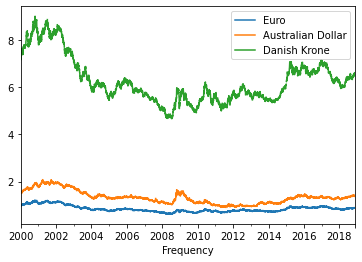

In [8]:
# Plot here
xr.plot();

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [9]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates are highly positively correlated, especially between the Danish Krone and the Euro. My best guess is that, because all of these exchange rates are quoted against the US dollar, then they are all affected by changes in the strength of the US dollar which makes them correlated. But if the Danish Krone and the Euro are even more strongly correlated, then there is a further positive relationship between the strength of the Danish Krone and the Euro.

----

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [11]:
# 1-lag differenced series 
xr_diff = xr.diff()

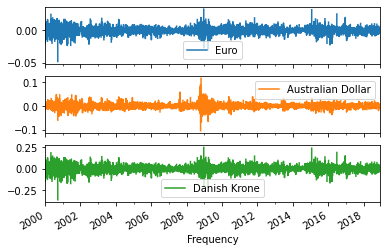

In [12]:
# Plot
xr_diff.plot(subplots=True);

Calculate the correlation of this differenced time series. 

In [13]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

The first differences of the Euro and the Australian Dollar exchange rates are less correlated than the actual values. I think that removing the first difference removes linear trends / makes exponential trends linear, so maybe we are now seeing the correlation (or lack thereof) between the random noise of the exchange rates. But there is still quite a bit of correlation to say that the first differences are just random noise.

----

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [14]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift()

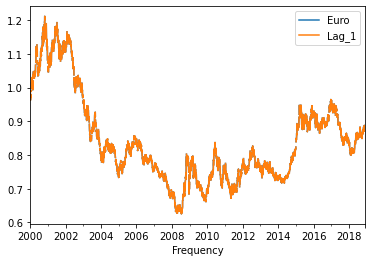

In [21]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis=1)
lag_1.columns = ['Euro', 'Lag_1']

# Plot 
lag_1.plot();

In [22]:
# Correlation
lag_1.corr()

,Euro,Lag_1
Euro,1.000000,0.999146
Lag_1,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

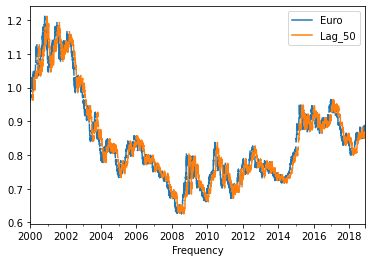

In [23]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis=1)
lag_50.columns = ['Euro', 'Lag_50']

# Plot
lag_50.plot();

In [24]:
# Correlation
lag_50.corr()

,Euro,Lag_50
Euro,1.000000,0.968321
Lag_50,0.968321,1.000000


### What's your conclusion here?

The lags are very highly correlated to the original, even the 50th lag is pretty highly correlated to the original value. Does this mean that the exchange rate is a random walk?

----

Knowing this, let's plot the ACF now.

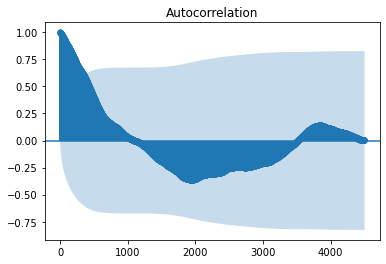

In [30]:
# Plot ACF
plot_acf(eur.dropna(), lags=4500); # make lags=4500 to look more similar to plot below

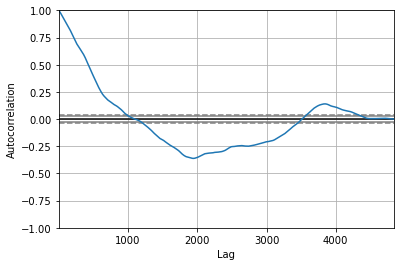

In [28]:
# use pandas plotting function instead
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

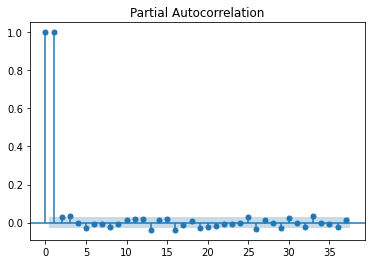

In [37]:
# Plot PACF
plot_pacf(eur.dropna());

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [38]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


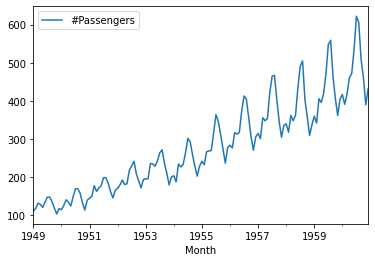

In [40]:
air.plot();

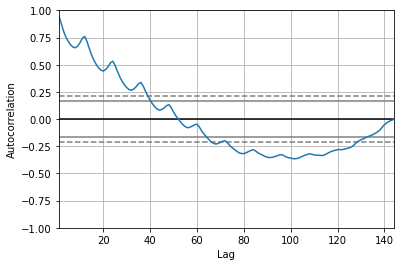

In [39]:
# Plot ACF (regular)
pd.plotting.autocorrelation_plot(air);

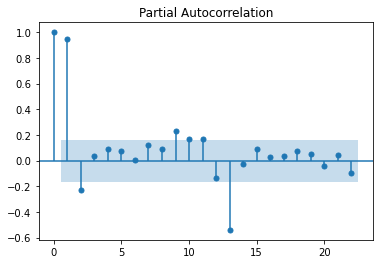

In [41]:
# Plot PACF (regular)
plot_pacf(air, method='ywm');

In [42]:
# Generate a differenced series
air_diff = air.diff()

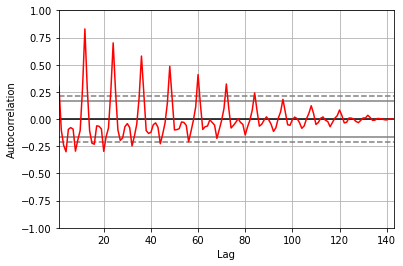

In [65]:
# Plot ACF (differenced)
# it is necessary to dropna here! Not sure why, but it doesn't plot correctly otherwise
pd.plotting.autocorrelation_plot(air_diff.dropna(), c='r');

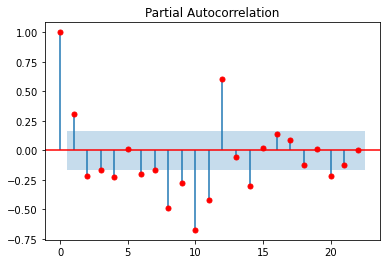

In [66]:
# Plot PACF (differenced)
plot_pacf(air_diff.dropna(), c='r');

### Your conclusion here

The original autocorrelation plot starts out showing a strong autocorrelation, then decreases to 0 as the number of lags increases, and the partial autocorrelation starts high and almost immediately decreases to statistical insignificance, which suggests a random walk. (I am curious about the negative spike in the PACF at *t*=13, though. It looks like this corresponds to the little peak on the graph between t=10 and t=20. I guess this makes sense; the lag will show a lower value, that of the preceding valley, than the actual value at that point, the peak. Does this indicate seasonality / a periodic rise and fall?)

The autocorrelation plot of the differenced values is more "stable", with a mean *almost* at 0 and a clear seasonality that decreases over time until it is not statistically significant. This also suggests a random walk, because the *changes* in the values are periodically strongly correlated (in a damped fashion) so the changes are becoming less and less correlated over time. (Is this a feature of the "randomness" of the walk? Every few periods, you *should* increase by roughly the same amount, because it is statistically unlikely that your random noise will have the same sign for many periods in a row, and the variance of the random noise is constant? I'm not sure that I understand the autocorrelation of the differenced series yet.)

**Is the autocorrelation plot of the differenced data periodic because you remove the trend when you difference the data, so you are left with only the seasonality?**

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [67]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


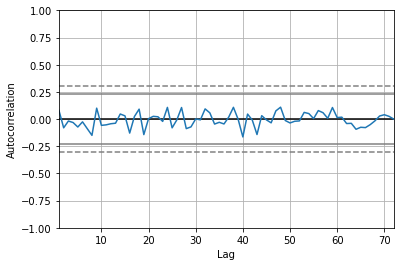

In [68]:
# Plot ACF
pd.plotting.autocorrelation_plot(nyse);

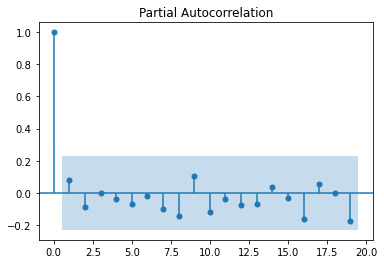

In [69]:
# Plot PACF
plot_pacf(nyse, method='ywm');

## Your conclusion here

The nyse time series is a random walk with no trend, seasonality or drift.



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!